In [167]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
csv_city_data = "data/city_data.csv"
csv_ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(csv_city_data)
ride_data = pd.read_csv(csv_ride_data)

# Combine the data into a single dataset
city_and_ride_data = pd.merge(city_data, ride_data,  on='city')



# Display the data table for preview
print(city_and_ride_data.count())

city            2375
driver_count    2375
type            2375
date            2375
fare            2375
ride_id         2375
dtype: int64


In [168]:
city_and_ride_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

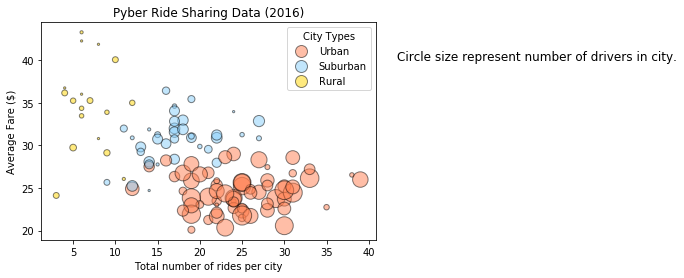

In [169]:
# Obtain the x and y coordinates for each of the three city types
types = city_and_ride_data.type.unique()
x_axis = np.arange(len(types))
x_labels = types
group_by_city = city_and_ride_data.groupby(["city"])
ride_counts = group_by_city["driver_count"].count()


#rides_per_city = csv_ride_data['city'].value_counts()
ride_counts
graph_data = pd.DataFrame({
    "Average Fare": group_by_city["fare"].mean(),
    "Total Rides": group_by_city["driver_count"].count(),
    "Driver Count": group_by_city["driver_count"].first(),
    "Type": group_by_city["type"].first(),
})

colors = {
    "Urban": "#ff7f50",
    "Suburban": "#87cefa",
    "Rural": "#ffd700"
}

dot_colors = [colors[val] for val in graph_data["Type"]]

# Build the scatter plots for each city types
plt.scatter(graph_data["Total Rides"], 
            graph_data["Average Fare"], 
            s=graph_data["Driver Count"]*5, 
            c=dot_colors,
            marker="o", 
            label=graph_data["Type"],
            edgecolors='black', 
            alpha=0.5)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total number of rides per city")
plt.ylabel("Average Fare ($)")

p1,= plt.plot([],[], 'o', c=colors["Urban"], markersize=12, markeredgecolor='black', alpha=0.5)
p2, = plt.plot([],[], 'o',c=colors["Suburban"], markersize=12, markeredgecolor='black', alpha=0.5)
p3, = plt.plot([],[], 'o',c=colors["Rural"], markersize=12, markeredgecolor='black', alpha=0.5)

# Create a legend
plt.legend(
    [p1,p2,p3],
    ["Urban","Suburban","Rural"],
    loc="upper right", 
    title="City Types",
    markerscale=1,
    fontsize=10,
    scatterpoints=1
)

# Incorporate a text label regarding circle size
plt.gcf().text(0.95,0.75,'Circle size represent number of drivers in city.',fontsize=12)

# Save Figure
plt.savefig('pyber_ride_sharing_bubble_plot.png')

In [170]:
# Show plot
plt.show()

## Total Fares by City Type

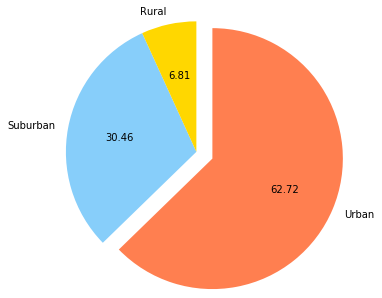

In [185]:
group_by_type = city_and_ride_data.groupby(["type"])
# Calculate Type Percents
fares_by_type = group_by_type["fare"].sum()

# Build Pie Chart
plt.pie([fares_by_type["Urban"],fares_by_type["Suburban"],fares_by_type["Rural"]],
        explode=[0.2,0,0],
        startangle=90,
        counterclock=False,
        radius=1.5,
        labels=["Urban","Suburban","Rural"],
        colors=colors.values(), 
        autopct='%.2f')
# Save Figure
plt.savefig('fare_type_pie.png')

In [172]:
# Show Figure
plt.show()

## Total Rides by City Type

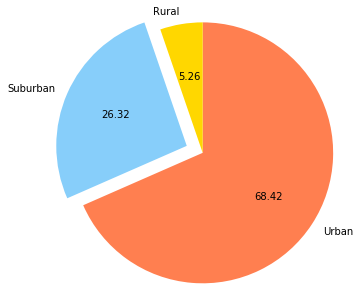

In [186]:
# Calculate Ride Percents
type_counts = city_and_ride_data["type"].value_counts()

# Build Pie Chart
plt.pie([type_counts["Urban"],type_counts["Suburban"],type_counts["Rural"]],
        explode=[0,0.2,0],
        radius=1.5,
        startangle=90,
        counterclock=False,
        labels=["Urban","Suburban","Rural"],
        colors=colors.values(), 
        autopct='%.2f')
# Save Figure
plt.savefig('ride_type_pie.png')

In [174]:
# Show Figure
plt.show()

## Total Drivers by City Type

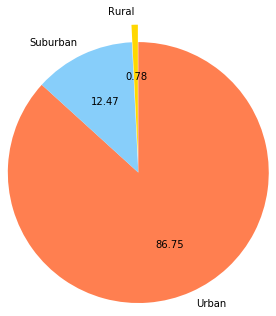

In [187]:
# Calculate Driver Percents
drivers_by_type = group_by_type["driver_count"].sum()

# Build Pie Charts
plt.pie([drivers_by_type["Urban"],drivers_by_type["Suburban"],drivers_by_type["Rural"]],
        explode=[0,0,0.2],
        radius=1.5,
        startangle=90,
        counterclock=False,
        labels=["Urban","Suburban","Rural"],
        colors=colors.values(),
        autopct='%.2f')
# Save Figure
plt.savefig('driver_type_pie.png')

In [176]:
# Show Figure
plt.show()